In [27]:
import pandas as pd
import numpy as np

In [28]:
#read the dataset

iris = pd.read_csv('iris.csv')


In [29]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [30]:
iris['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [31]:
iris['variety'] = iris['variety'].replace({'Setosa' : 0, 'Versicolor' : 1, 'Virginica' : 2})
iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2
150,5.9,3.0,5.1,1.8,2


In [32]:
X = iris.drop(['variety'], axis = 1)
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [33]:
y = iris['variety']
y

0      0
1      0
2      0
3      0
4      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: variety, Length: 151, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

## Training Model

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=200)

##   rows for TRAINING

In [36]:
X_train.shape

(120, 4)

## rows for TESTING

In [37]:
X_test.shape

(31, 4)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [39]:
knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean', p=2)

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [41]:
X_test.head()

,sepal.length,sepal.width,petal.length,petal.width
81,5.5,2.4,3.8,1.1
24,4.8,3.4,1.9,0.2
92,6.1,3.0,4.6,1.4
48,5.3,3.7,1.5,0.2
53,6.9,3.1,4.9,1.5


In [42]:
# Mapping dictionary for variety names
variety_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# Use the trained model to predict
predicted_values = knn.predict([[6.6, 3.0, 4.4, 1.4]])

# Convert the predicted values to variety names using the mapping
predicted_variety_name = variety_mapping.get(predicted_values[0])

print("Predicted Variety Name:", predicted_variety_name)


Predicted Variety Name: Versicolor


c:\Users\angie\OneDrive\Documents\GitHub\SMARTS\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [43]:
joblib.dump(knn, 'knnscratch.joblib')

['knnscratch.joblib']

In [44]:
y_test.head()

81    1
24    0
92    1
48    0
53    1
Name: variety, dtype: int64

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [46]:
predictions = knn.predict(X_test)

In [47]:
predictions

array([1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 2, 1, 0,
       2, 2, 0, 2, 0, 1, 1, 0, 2], dtype=int64)

In [48]:
cm = confusion_matrix(y_test, predictions)
cm

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  8]], dtype=int64)

In [49]:
import seaborn as sns
from matplotlib import pyplot as plt

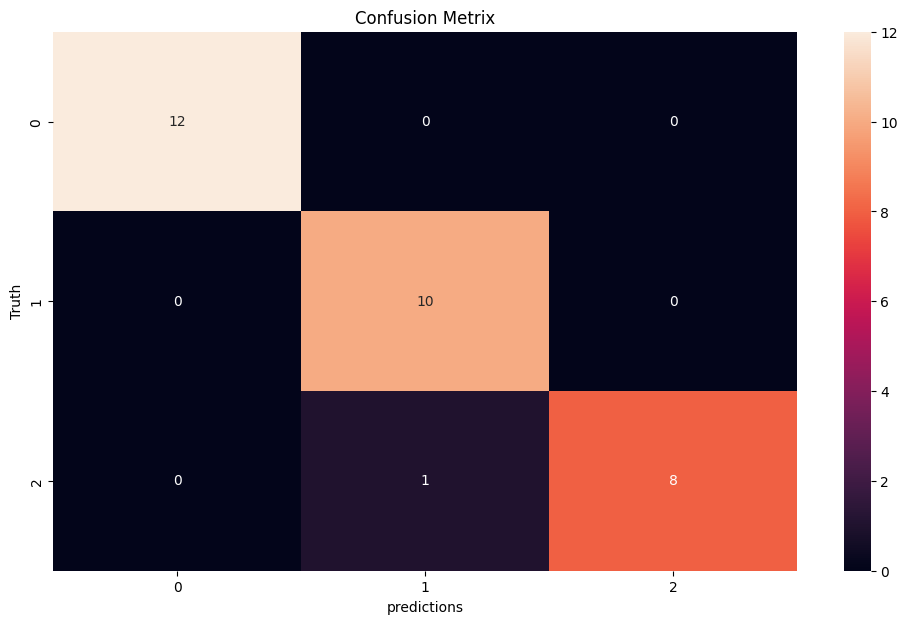

In [50]:
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot = True)
plt.xlabel("predictions")
plt.ylabel("Truth")
plt.title("Confusion Metrix")
plt.show()

In [51]:
accuracy_score(y_test, predictions)

0.967741935483871

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        31
   macro avg       0.97      0.96      0.96        31
weighted avg       0.97      0.97      0.97        31

